In [1]:
import os
import sys

import numpy as np
import pandas as pd
import polars as pl

import matplotlib.pyplot as plt
import seaborn as sns

# Random Seeds
SEED=3093453
np.random.seed(SEED)



# Cosmetics
np.set_printoptions(
    edgeitems=30,
    linewidth=100_000,
    suppress=True
    )

sns.set(
    context="talk",
    style="darkgrid"
)


cwd = os.getcwd()
cwd, _ = os.path.split(cwd)

In [6]:


df = pd.DataFrame(columns = ["Set", "Filename", "raw"])


#for Set in ["A", "B", "C"]:
for Set in ["X", "8hTime_warmStart_tightGroups"]:
    path = os.path.join(cwd, "data", Set)
    for dirpath, dirnames, filenames in os.walk(path):
        filenames = sorted(filenames)
        for filename in filenames:
            if not filename.endswith(".out"):
                continue
            filepath = os.path.join(dirpath, filename)
            #print(filename)
            with open(filepath, "r") as f:
                raw_text = f.read()
            
            data = pd.DataFrame([[Set, filename[:-4], raw_text]], columns = ["Set", "Filename", "raw"])
            df = pd.concat([df, data])


#df = df[df.Filename.str.contains(r"[A-Z][A-Z]\d?\-\d{1,3}")]

#df = df[df["Filename"].str.len() >3]
df
df["Threshold"] = df["Filename"].str.extract("\-(\d*)").astype(float)

df["Instance"] = df["Filename"].str.split("-").str[0]
df = df.sort_values(["Set", "Filename"]).reset_index(drop=True)

df

,Set,Filename,raw,Threshold,Instance
0,8hTime_warmStart_tightGroups,AS6-80-0,"cpu-bind=MASK - cn-0180, task 0 0 [222531]: ...",80.0,AS6
1,8hTime_warmStart_tightGroups,AS7-80-0,"cpu-bind=MASK - cn-0126, task 0 0 [2788963]:...",80.0,AS7
2,8hTime_warmStart_tightGroups,BY6-80-0,"cpu-bind=MASK - cn-0256, task 0 0 [3103019]:...",80.0,BY6
3,8hTime_warmStart_tightGroups,BY7-80-0,"cpu-bind=MASK - cn-0178, task 0 0 [674737]: ...",80.0,BY7
4,8hTime_warmStart_tightGroups,CC6-80-0,"cpu-bind=MASK - cn-0126, task 0 0 [2788957]:...",80.0,CC6
...,...,...,...,...,...
1256,X,VA7-90-4,"cpu-bind=MASK - cn-0255, task 0 0 [140886]: ...",90.0,VA7
1257,X,VA7-90-5,"cpu-bind=MASK - cn-0198, task 0 0 [1901417]:...",90.0,VA7
1258,X,VA7-90-6,"cpu-bind=MASK - cn-0217, task 0 0 [1503285]:...",90.0,VA7
1259,X,VA7-90-7,"cpu-bind=MASK - cn-0255, task 0 0 [141114]: ...",90.0,VA7


In [7]:
df["finalObjective"] = df.raw.str.extract("Final Solution\nObjective;(\d*\.?\d?)\nTransportation cost;").astype(float)
df["finalTransportationCost"] = df.raw.str.extract("Final Solution\nObjective;\d*\.?\d?\nTransportation cost;(\d*\.?\d?)").astype(float)
df["finalInventoryCost"] = df.raw.str.extract(
    "Final Solution\nObjective;\d*\.?\d?\nTransportation cost;\d*\.?\d?\nInventory cost;(\d*\.?\d?)"
).astype(float)
df["Runtime"] = df.raw.str.extract(
    "Final Solution\nObjective;\d*\.?\d?\nTransportation cost;\d*\.?\d?\nInventory cost;\d*\.?\d?\nRuntime;(\d*\.?\d?)"
).astype(float)
#df["finalObjective"].hist()

In [8]:
df

,Set,Filename,raw,Threshold,Instance,finalObjective,finalTransportationCost,finalInventoryCost,Runtime
0,8hTime_warmStart_tightGroups,AS6-80-0,"cpu-bind=MASK - cn-0180, task 0 0 [222531]: ...",80.0,AS6,9374321.0,9259500.0,114821.0,6786.4
1,8hTime_warmStart_tightGroups,AS7-80-0,"cpu-bind=MASK - cn-0126, task 0 0 [2788963]:...",80.0,AS7,1924147.0,1851000.0,73147.0,8877.4
2,8hTime_warmStart_tightGroups,BY6-80-0,"cpu-bind=MASK - cn-0256, task 0 0 [3103019]:...",80.0,BY6,47588741.0,46597500.0,991241.0,13126.1
3,8hTime_warmStart_tightGroups,BY7-80-0,"cpu-bind=MASK - cn-0178, task 0 0 [674737]: ...",80.0,BY7,9667439.0,9324000.0,343439.0,18178.6
4,8hTime_warmStart_tightGroups,CC6-80-0,"cpu-bind=MASK - cn-0126, task 0 0 [2788957]:...",80.0,CC6,3137081.0,3012000.0,125081.0,1859.2
...,...,...,...,...,...,...,...,...,...
1256,X,VA7-90-4,"cpu-bind=MASK - cn-0255, task 0 0 [140886]: ...",90.0,VA7,29109.0,24000.0,5109.0,6.0
1257,X,VA7-90-5,"cpu-bind=MASK - cn-0198, task 0 0 [1901417]:...",90.0,VA7,29109.0,24000.0,5109.0,6.3
1258,X,VA7-90-6,"cpu-bind=MASK - cn-0217, task 0 0 [1503285]:...",90.0,VA7,29109.0,24000.0,5109.0,6.3
1259,X,VA7-90-7,"cpu-bind=MASK - cn-0255, task 0 0 [141114]: ...",90.0,VA7,29109.0,24000.0,5109.0,5.9


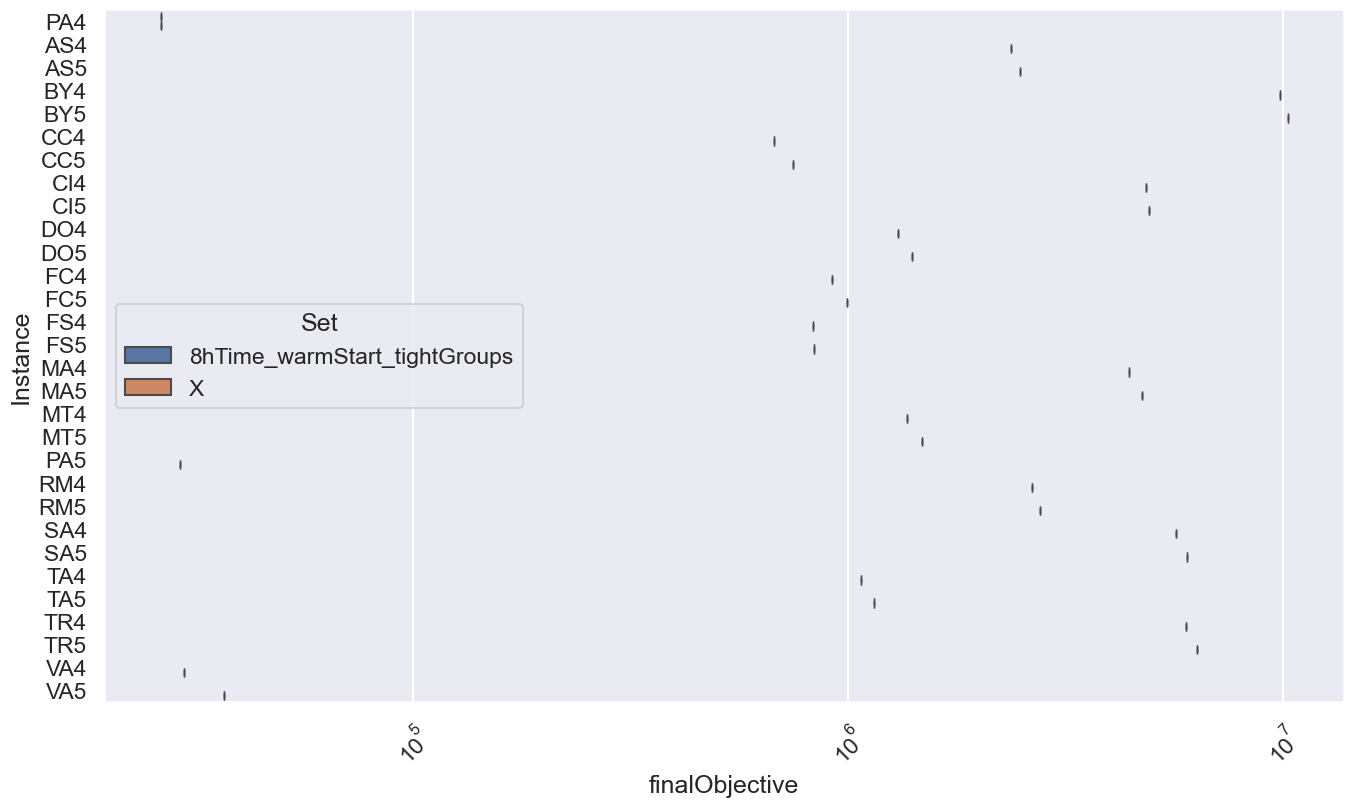

In [10]:
plt.figure(figsize=(16, 9))

sns.boxplot(
    data=df[(df["Instance"].str.endswith("4")|df["Instance"].str.endswith("5")) & ( (df["Threshold"]==80) | (df["Set"] == "X-RERUN") )],
    x="finalObjective", y="Instance", hue="Set"
);
plt.xscale("log");
#plt.yscale("log");
plt.xticks(rotation=45);

In [11]:
num_LNS_iterations = df["raw"].str.extractall(r"LNS iteration (\d*)").astype(int).reset_index().groupby("level_0")[0].max()

In [12]:
num_LNS_iterations = df["raw"].str.extractall(r"LNS iteration (\d*)").astype(int).reset_index().groupby("level_0")[0].max()
#num_LNS_iterations.index.name=
num_LNS_iterations.name = "num_LNS_iter"
df = df.join(num_LNS_iterations)
df["num_LNS_iter"] = df["num_LNS_iter"].fillna(0).astype(int)

In [13]:
df.head()

,Set,Filename,raw,Threshold,Instance,finalObjective,finalTransportationCost,finalInventoryCost,Runtime,num_LNS_iter
0,8hTime_warmStart_tightGroups,AS6-80-0,"cpu-bind=MASK - cn-0180, task 0 0 [222531]: ...",80.0,AS6,9374321.0,9259500.0,114821.0,6786.4,13
1,8hTime_warmStart_tightGroups,AS7-80-0,"cpu-bind=MASK - cn-0126, task 0 0 [2788963]:...",80.0,AS7,1924147.0,1851000.0,73147.0,8877.4,15
2,8hTime_warmStart_tightGroups,BY6-80-0,"cpu-bind=MASK - cn-0256, task 0 0 [3103019]:...",80.0,BY6,47588741.0,46597500.0,991241.0,13126.1,12
3,8hTime_warmStart_tightGroups,BY7-80-0,"cpu-bind=MASK - cn-0178, task 0 0 [674737]: ...",80.0,BY7,9667439.0,9324000.0,343439.0,18178.6,25
4,8hTime_warmStart_tightGroups,CC6-80-0,"cpu-bind=MASK - cn-0126, task 0 0 [2788957]:...",80.0,CC6,3137081.0,3012000.0,125081.0,1859.2,9


In [14]:
df

,Set,Filename,raw,Threshold,Instance,finalObjective,finalTransportationCost,finalInventoryCost,Runtime,num_LNS_iter
0,8hTime_warmStart_tightGroups,AS6-80-0,"cpu-bind=MASK - cn-0180, task 0 0 [222531]: ...",80.0,AS6,9374321.0,9259500.0,114821.0,6786.4,13
1,8hTime_warmStart_tightGroups,AS7-80-0,"cpu-bind=MASK - cn-0126, task 0 0 [2788963]:...",80.0,AS7,1924147.0,1851000.0,73147.0,8877.4,15
2,8hTime_warmStart_tightGroups,BY6-80-0,"cpu-bind=MASK - cn-0256, task 0 0 [3103019]:...",80.0,BY6,47588741.0,46597500.0,991241.0,13126.1,12
3,8hTime_warmStart_tightGroups,BY7-80-0,"cpu-bind=MASK - cn-0178, task 0 0 [674737]: ...",80.0,BY7,9667439.0,9324000.0,343439.0,18178.6,25
4,8hTime_warmStart_tightGroups,CC6-80-0,"cpu-bind=MASK - cn-0126, task 0 0 [2788957]:...",80.0,CC6,3137081.0,3012000.0,125081.0,1859.2,9
...,...,...,...,...,...,...,...,...,...,...
1256,X,VA7-90-4,"cpu-bind=MASK - cn-0255, task 0 0 [140886]: ...",90.0,VA7,29109.0,24000.0,5109.0,6.0,0
1257,X,VA7-90-5,"cpu-bind=MASK - cn-0198, task 0 0 [1901417]:...",90.0,VA7,29109.0,24000.0,5109.0,6.3,0
1258,X,VA7-90-6,"cpu-bind=MASK - cn-0217, task 0 0 [1503285]:...",90.0,VA7,29109.0,24000.0,5109.0,6.3,0
1259,X,VA7-90-7,"cpu-bind=MASK - cn-0255, task 0 0 [141114]: ...",90.0,VA7,29109.0,24000.0,5109.0,5.9,0


In [15]:
reference_df = df[df.Threshold.isnull()].copy()
df = df[~df.Threshold.isnull()].copy().reset_index(drop=True)
df["Threshold"] = df["Threshold"].astype(int)
df.head()

,Set,Filename,raw,Threshold,Instance,finalObjective,finalTransportationCost,finalInventoryCost,Runtime,num_LNS_iter
0,8hTime_warmStart_tightGroups,AS6-80-0,"cpu-bind=MASK - cn-0180, task 0 0 [222531]: ...",80,AS6,9374321.0,9259500.0,114821.0,6786.4,13
1,8hTime_warmStart_tightGroups,AS7-80-0,"cpu-bind=MASK - cn-0126, task 0 0 [2788963]:...",80,AS7,1924147.0,1851000.0,73147.0,8877.4,15
2,8hTime_warmStart_tightGroups,BY6-80-0,"cpu-bind=MASK - cn-0256, task 0 0 [3103019]:...",80,BY6,47588741.0,46597500.0,991241.0,13126.1,12
3,8hTime_warmStart_tightGroups,BY7-80-0,"cpu-bind=MASK - cn-0178, task 0 0 [674737]: ...",80,BY7,9667439.0,9324000.0,343439.0,18178.6,25
4,8hTime_warmStart_tightGroups,CC6-80-0,"cpu-bind=MASK - cn-0126, task 0 0 [2788957]:...",80,CC6,3137081.0,3012000.0,125081.0,1859.2,9


In [20]:
#print(reference_df[reference_df.Instance == "TA4"]["raw"].item())
reference_df.head(10)

,Set,Filename,raw,Threshold,Instance,finalObjective,finalTransportationCost,finalInventoryCost,Runtime,num_LNS_iter
31,X,AS,"cpu-bind=MASK - cn-0002, task 0 0 [2204321]:...",NaN,AS,2017343.0,1942200.0,75143.0,3590.9,3
43,X,AS2,"cpu-bind=MASK - cn-0256, task 0 0 [978147]: ...",NaN,AS2,2173535.0,2043600.0,129935.0,3595.7,3
55,X,AS3,"cpu-bind=MASK - cn-0214, task 0 0 [2414625]:...",NaN,AS3,9809539.0,9706500.0,103039.0,3597.4,3
67,X,AS4,"cpu-bind=MASK - cn-0245, task 0 0 [3948989]:...",NaN,AS4,2048455.0,1975500.0,72955.0,3596.1,3
79,X,AS5,"cpu-bind=MASK - cn-0202, task 0 0 [588995]: ...",NaN,AS5,2217620.0,2084700.0,132920.0,3594.9,3
91,X,AS6,"cpu-bind=MASK - cn-0136, task 0 0 [1304453]:...",NaN,AS6,9971670.0,9856500.0,115170.0,3455.8,3
102,X,AS7,"cpu-bind=MASK - cn-0182, task 0 0 [4157742]:...",NaN,AS7,2016788.0,1947000.0,69788.0,3580.3,3
113,X,BY,"cpu-bind=MASK - cn-0052, task 0 0 [2203113]:...",NaN,BY,9235780.0,8956800.0,278980.0,3584.3,8
125,X,BY2,"cpu-bind=MASK - cn-0146, task 0 0 [1351828]:...",NaN,BY2,9795265.0,9442500.0,352765.0,3448.7,10
137,X,BY3,"cpu-bind=MASK - cn-0235, task 0 0 [439165]: ...",NaN,BY3,44894111.0,44143500.0,750611.0,3494.5,6


In [18]:
df = df.merge(
    reference_df[["Set", "Instance", "finalTransportationCost", "finalInventoryCost", "finalObjective", "Runtime", "num_LNS_iter"]],
    how="left",
    on=[#"Set",
        "Instance"],
    suffixes=("", "_Reference"),
    
)
df.head()

,Set,Filename,raw,Threshold,Instance,finalObjective,finalTransportationCost,finalInventoryCost,Runtime,num_LNS_iter,Set_Reference,finalTransportationCost_Reference,finalInventoryCost_Reference,finalObjective_Reference,Runtime_Reference,num_LNS_iter_Reference
0,8hTime_warmStart_tightGroups,AS6-80-0,"cpu-bind=MASK - cn-0180, task 0 0 [222531]: ...",80,AS6,9374321.0,9259500.0,114821.0,6786.4,13,X,9856500.0,115170.0,9971670.0,3455.8,3
1,8hTime_warmStart_tightGroups,AS7-80-0,"cpu-bind=MASK - cn-0126, task 0 0 [2788963]:...",80,AS7,1924147.0,1851000.0,73147.0,8877.4,15,X,1947000.0,69788.0,2016788.0,3580.3,3
2,8hTime_warmStart_tightGroups,BY6-80-0,"cpu-bind=MASK - cn-0256, task 0 0 [3103019]:...",80,BY6,47588741.0,46597500.0,991241.0,13126.1,12,X,47200500.0,1022947.0,48223447.0,3544.5,5
3,8hTime_warmStart_tightGroups,BY7-80-0,"cpu-bind=MASK - cn-0178, task 0 0 [674737]: ...",80,BY7,9667439.0,9324000.0,343439.0,18178.6,25,X,9808500.0,221220.0,10029720.0,3577.1,3
4,8hTime_warmStart_tightGroups,CC6-80-0,"cpu-bind=MASK - cn-0126, task 0 0 [2788957]:...",80,CC6,3137081.0,3012000.0,125081.0,1859.2,9,X,3042000.0,119165.0,3161165.0,1198.8,5


In [22]:
df["Subset"] = "Training"
df.loc[(df.Set.str.contains("X")) & (df.Instance.str.endswith("4") | df.Instance.str.endswith("5")), "Subset"] = "Validation"
df.loc[(df.Set.str.contains("X")) & (df.Instance.str.endswith("6") | df.Instance.str.endswith("7")), "Subset"] = "Testing"

In [23]:
df = df[(df["Subset"] == "Testing")]

In [24]:
clms = df.columns

for clm in clms[clms.str.contains("_Reference")]:
    clm_clean = clm.split("_Reference")[0]
    if df[clm].dtype == "O":
        continue
    df[clm_clean] = df[clm_clean] / df[clm]

df.head()

,Set,Filename,raw,Threshold,Instance,finalObjective,finalTransportationCost,finalInventoryCost,Runtime,num_LNS_iter,Set_Reference,finalTransportationCost_Reference,finalInventoryCost_Reference,finalObjective_Reference,Runtime_Reference,num_LNS_iter_Reference,Subset
86,X,AS6-90,"cpu-bind=MASK - cn-0058, task 0 0 [3145857]:...",90,AS6,0.953500,0.953432,0.959382,0.799236,4.000000,X,9856500.0,115170.0,9971670.0,3455.8,3,Testing
87,X,AS6-90-0,"cpu-bind=MASK - cn-0106, task 0 0 [3461650]:...",90,AS6,0.946129,0.945823,0.972345,0.775537,4.000000,X,9856500.0,115170.0,9971670.0,3455.8,3,Testing
88,X,AS6-90-1,"cpu-bind=MASK - cn-0106, task 0 0 [3461625]:...",90,AS6,0.942477,0.942170,0.968724,0.762313,3.666667,X,9856500.0,115170.0,9971670.0,3455.8,3,Testing
89,X,AS6-90-2,"cpu-bind=MASK - cn-0106, task 0 0 [3461626]:...",90,AS6,0.946588,0.946127,0.986064,0.791770,4.666667,X,9856500.0,115170.0,9971670.0,3455.8,3,Testing
90,X,AS6-90-3,"cpu-bind=MASK - cn-0107, task 0 0 [2891141]:...",90,AS6,0.942287,0.941714,0.991352,0.788298,4.666667,X,9856500.0,115170.0,9971670.0,3455.8,3,Testing


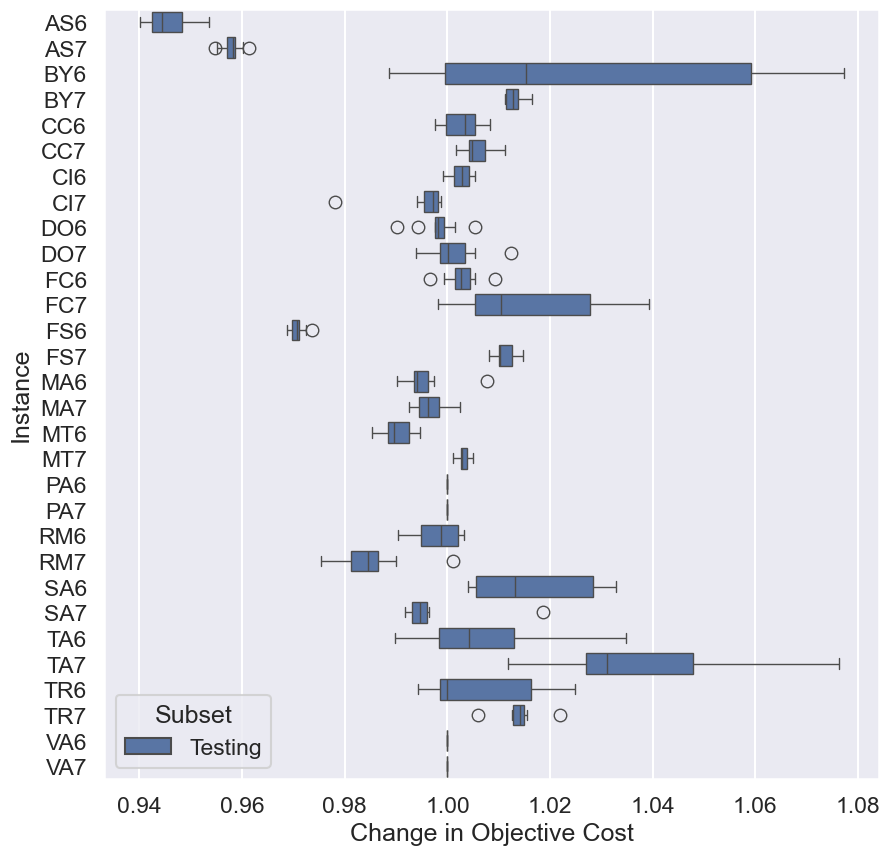

In [25]:
plt.figure(figsize=(10, 10))
#sns.boxplot(data=df, y="Instance", x="finalObjective", hue="Set");
sns.boxplot(data=df, y="Instance", x="finalObjective", hue="Subset");
plt.xlabel("Change in Objective Cost");

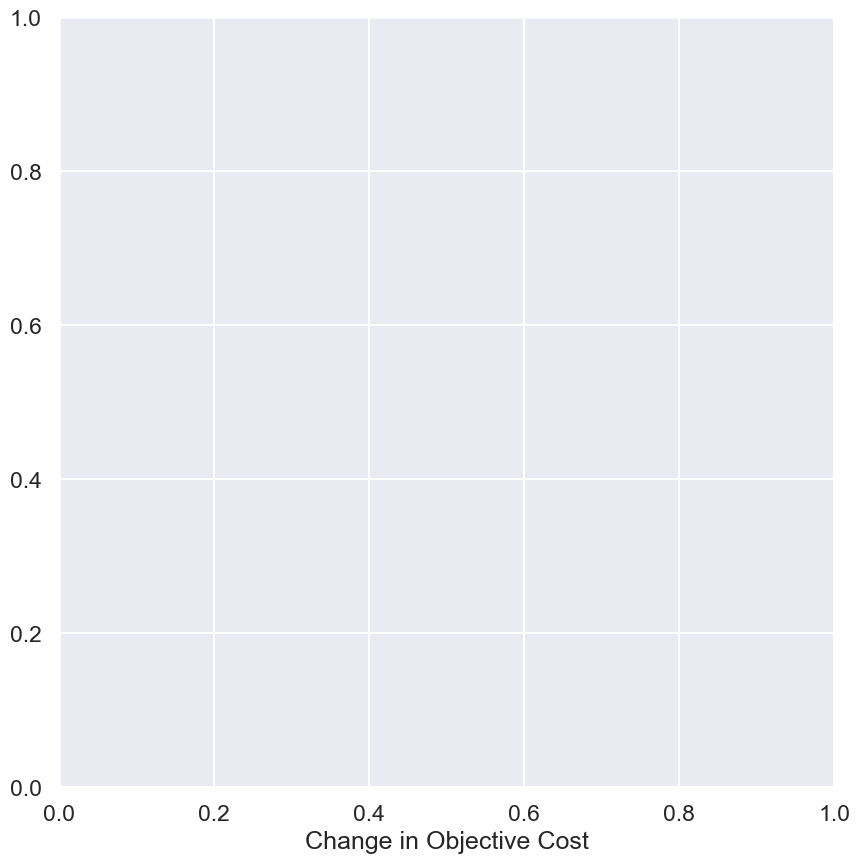

In [26]:
plt.figure(figsize=(10, 10))
#sns.boxplot(data=df, y="Instance", x="finalObjective", hue="Set");
sns.boxplot(data=df[df["Threshold"] == 80], y="Instance", x="finalObjective", hue="Subset");
plt.xlabel("Change in Objective Cost");

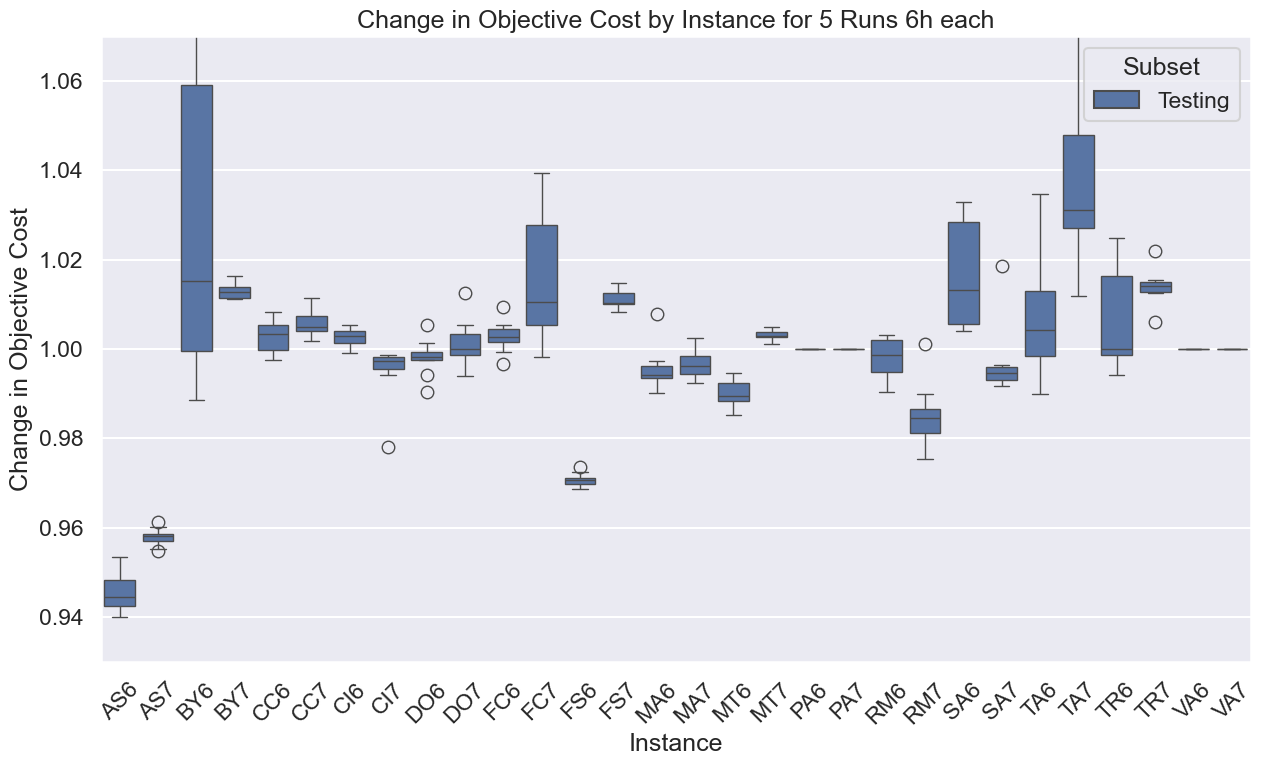

In [36]:
plt.figure(figsize=(13, 8))

#sns.boxplot(data=df, y="Instance", x="finalObjective", hue="Set");
sns.boxplot(data=df, x="Instance", y="finalObjective", hue="Subset");
#sns.boxplot(data=df[(df.Threshold==th)], x="Instance", y="finalObjective", hue="Subset");
plt.ylabel("Change in Objective Cost");
plt.title(f"Change in Objective Cost by Instance for 5 Runs 6h each");
plt.xticks(rotation=45);
plt.ylim([0.93, 1.07])

plt.tight_layout()
for file_format in ["pdf"]:
    #path = os.path.join(cwd, "plots", "2024-04-18-ExperimentsThreshold-FIXED", f"Change in Objective by Instance 70-95.{file_format}")
    path = os.path.join(cwd, "plots", "2024-04-22-ExperimentsThreshold-8hRun", f"Change in Objective by Instance for long runs.{file_format}")
    plt.savefig(path)


In [ ]:
plt.figure(figsize=(13, 8))

th=75
#sns.boxplot(data=df, y="Instance", x="finalObjective", hue="Set");
#sns.boxplot(data=df[(70<df.Threshold)&(df.Threshold< 100)], x="Instance", y="finalObjective", hue="Subset");
sns.boxplot(data=df[(df.Threshold==th)], x="Instance", y="finalObjective", hue="Subset");
plt.ylabel("Change in Objective Cost");
plt.title(f"Change in Objective Cost by Instance for a Threshold of {th} and 4 Runs");
plt.xticks(rotation=45);
plt.ylim([0.95, 1.05])

plt.tight_layout()
for file_format in ["pdf"]:
    #path = os.path.join(cwd, "plots", "2024-04-18-ExperimentsThreshold-FIXED", f"Change in Objective by Instance 70-95.{file_format}")
    path = os.path.join(cwd, "plots", "2024-04-18-ExperimentsThreshold-FIXED", f"Change in Objective by Instance{th}.{file_format}")
    plt.savefig(path)


In [ ]:
plt.figure(figsize=(10, 10))
#sns.boxplot(data=df, y="Instance", x="finalObjective", hue="Set");
sns.boxplot(data=df, y="Instance", x="finalObjective", hue="Subset");
plt.xlabel("Change in Objective Cost");

In [ ]:
plt.figure(figsize=(13, 8))
sns.boxplot(data=df[(70<df.Threshold)&(df.Threshold< 100)], y="finalObjective", x="Threshold", hue="Subset");
plt.xlabel("Threshold [%]")
plt.ylabel("Change in Objective Cost [lower is better]");
plt.title("Change in Objective by Threshold")

plt.tight_layout()
for file_format in ["pdf"]:
    path = os.path.join(cwd, "plots", "2024-04-18-ExperimentsThreshold-FIXED", f"Change in Objective by Threshold.{file_format}")
    plt.savefig(path)


In [ ]:
df.groupby("Threshold")[["finalObjective"]].agg(["mean", "std", "count"])

In [ ]:
import statsmodels.api as sm


#X = df[(70<df.Threshold)&(df.Threshold< 100)]
X = df.copy()
dummies = pd.get_dummies(X["Instance"])
X[dummies.columns] = dummies.astype(int)
X = X.dropna(axis=0)

y = X["finalObjective"]
X = X[["Threshold"]+dummies.columns.to_list()]
X["Threshold^2"] = X["Threshold"]**2
X

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

In [ ]:
model.params[["Threshold", "Threshold^2"]]

In [ ]:
#-0.000648x + 0.000004x^2

for x in [70, 75, 80, 85, 90, 95]:
    print(-0.000648 + 0.000008*x)

In [ ]:
print(df.loc[df["Filename"] == "RM5-50", "raw"].item())

In [ ]:
from scipy.stats import norm, t

t_value = (0.995017-1) /(0.017117/29**0.5)
print(t_value)

t.cdf(t_value, df=29-1)

In [ ]:
x = df.finalObjective[df.Threshold == 90]
x = x[~x.isnull()]

t_value = (1-x.mean()) / x.std() * len(x)**0.5
t_value

In [ ]:
from scipy.stats import t

t.pdf(t_value, df=len(x)-1)

In [ ]:
plt.figure(figsize=(13, 8))
sns.boxplot(data=df, y="Runtime", x="Threshold", hue="Subset");
plt.xlabel("Threshold [%]")
plt.ylabel("Change in Runtime [lower is better]");
plt.title("Relative Change in Run Time by Threshold")


plt.tight_layout()
for file_format in ["pdf"]:
    path = os.path.join(cwd, "plots", "2024-04-18-ExperimentsThreshold-FIXED", f"Change in Runtime by Threshold VALIDATION.{file_format}")
    plt.savefig(path)

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, y="num_LNS_iter", x="Threshold", hue="Subset");
plt.ylabel("Number of LNS Iterations");
plt.title("Ratio of LNS Iterations relative to Challenge Run by Threshold");
plt.tight_layout()

In [ ]:
reference_df[(reference_df.Set == "A")&(reference_df.Instance == "BU")]

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, y="Instance", x="num_LNS_iter", hue="Subset");
#plt.ylabel("Change in Runtime");

## Crosstable Model / Area

In [ ]:
idx = df[(df.Instance == "TA4")& (df.Threshold==80)]#.index.item()
idx

In [ ]:
tab = (
    df["raw"]
    .str.extractall("Model Prediction: (\d\.\d*)-Neuer Approach: .*?\n-Packed Area\s*:(\d\.\d*)-Alter Approach:")
    .astype(float)
    .reset_index()
    .drop("match", axis=1)
    .rename({
        "level_0": "Instance",
        0: "Prediction",
        1: "AreaRatio",
    },axis=1)
)
tab.head()

In [ ]:
sub_tab = tab.loc[tab.Instance == idx]

fig, ax = plt.subplots(2, figsize=(10, 10))

sns.histplot(data=sub_tab, x="Prediction", bins=np.arange(-0.1, 1.1, 0.05),ax=ax[0]);
sns.histplot(data=sub_tab, x="AreaRatio", bins=np.arange(-0.1, 1.1, 0.05),ax=ax[1]);

ax[0].set(ylabel="Prediction", xlim=[0, 1])
ax[1].set(ylabel="AreaRation", xlim=[0, 1]);

plt.tight_layout()
for file_format in ["pdf"]:
    path = os.path.join(cwd, "plots", "2024-04-12-ExperimentsThreshold-DEBUG", f"TA4-Prediction+AreaRatio.{file_format}")
    plt.savefig(path)
    pass

In [ ]:
sns.scatterplot(data=sub_tab, x="AreaRatio", y="Prediction", alpha=0.5);

In [ ]:
crosstab = pd.crosstab((sub_tab["Prediction"] > 0.8), (sub_tab["AreaRatio"] < .9))
crosstab[True] = 0
crosstab

In [ ]:
crosstab = pd.crosstab((tab["Prediction"] > 0.8), (tab["AreaRatio"] < .9), normalize=True)
(crosstab*100).round(1)

In [ ]:
stacks = df["raw"].str.extractall("\nStack (\d*) with items:")\
    .reset_index()\
    .set_index("level_0")\
    .astype({0: int})
stacks

In [ ]:
stack_counts = stacks[0].value_counts().sort_index(ascending=True).diff(-1)

#plt.bar(stack_counts.index, stack_counts);
stack_counts#.index.max()

In [ ]:
prediction_times = (
    df["raw"]
    .str.extractall("Time spent for prediction: (\d\.\d*) for Batch of (\d*) truck plans")
    .reset_index()
    .rename({"level_0": "Instance",
             "match": "LNS-Iteration",
             0: "InferenceTime",
             1: "numTrucks"},
            axis=1)
    .astype({"InferenceTime": float,
             "numTrucks": int})
)

TA4_index = df[df.Instance=="TA4"].index

prediction_times[ np.isin(prediction_times.Instance, TA4_index)]

sns.regplot(
    data = prediction_times[ np.isin(prediction_times.Instance, TA4_index)],
    x = "numTrucks",
    y = "InferenceTime",
    #logx=True
)
plt.xlabel("Number of Trucks")
plt.ylabel("Inference Time [s]");
plt.title("Inference Time by Truck count for Instance X-TA4");

plt.tight_layout()
for file_format in ["pdf"]:
    path = os.path.join(cwd, "plots", "2024-04-18-ExperimentsThreshold-FIXED", f"TA4-InferenceTime.{file_format}")
    plt.savefig(path)
    pass

In [ ]:
sns.regplot(data=df.loc[TA4_index], x="Threshold", y="finalObjective");
#sns.regplot(data=df.loc[TA4_index], x="Threshold", y="finalTransportationCost");
#sns.regplot(data=df.loc[TA4_index], x="Threshold", y="finalInventoryCost");

plt.xlabel("Threshold [%]")
#plt.ylabel("Inference Time [s]");
plt.title("Final Objective by Threshold for Instance X-TA4");


plt.tight_layout()
for file_format in ["pdf"]:
    path = os.path.join(cwd, "plots", "2024-04-18-ExperimentsThreshold-FIXED", f"TA4-ObjectiveByThreshold.{file_format}")
    plt.savefig(path)
    pass

In [ ]:
print(df.loc[TA4_index]["raw"][274])

In [ ]:
sns.regplot(data=df.loc[TA4_index], x="Threshold", y="num_LNS_iter");
plt.ylabel("LNS Iterations")
plt.title("Number of LNS Iterations by Threshold\ncompared to TA4 (5 Iterations)")

plt.tight_layout()
for file_format in ["pdf"]:
    path = os.path.join(cwd, "plots", "2024-04-18-ExperimentsThreshold-FIXED", f"TA4-LNS_IterByThreshold.{file_format}")
    plt.savefig(path)
    pass

In [ ]:
df

### Compare the number of LNS-Iterations

In [ ]:
LNS_iter_times_reference = (
    reference_df[reference_df.Instance == "TA4"]["raw"]
    .str.extractall("numTrucksRepack:\s*\d*\nRemaining Time:\s*(\d*\.\d*)")
    .astype(float)
    .diff(-1)
)
LNS_iter_times_reference

In [ ]:
LNS_iter_times = (
    df[df.Instance == "TA4"]["raw"]
    .str.extractall("numTrucksRepack:\s*\d*\nRemaining Time:\s*(\d*\.\d*)")
    .astype(float)
    .diff(-1)
)
LNS_iter_times[LNS_iter_times[0]<0] = np.nan
LNS_iter_times.head(7)

In [ ]:

#LNS_iter_times_reference[LNS_iter_times_reference[0]<0] = np.nan

fig, ax = plt.subplots(figsize=(13, 8))
LNS_iter_times.hist(ax=ax, bins=np.arange(0, 750, 50))
LNS_iter_times_reference.hist(ax=ax, bins=np.arange(0, 750, 50))

In [ ]:
LNS_iter_times_reference

In [ ]:
#LNS_iter_times = LNS_iter_times.dropna().reset_index().set_index("level_0").merge(df[["Threshold"]], left_index=True, right_index=True)

LNS_iter_times.groupby("match")[[0]].mean()

In [ ]:
LNS_iter_times[LNS_iter_times.Threshold > 50]

In [ ]:
prediction_times.groupby("Instance")["LNS-Iteration"].max().hist(bins=np.arange(0, 22, 1)-0.5);
plt.xlabel("Number of LNS-Iterations");

In [ ]:
logs = []

path = os.path.join(cwd, "data", "TA4-RERUNS")
for dirpath, dirnames, filenames in os.walk(path):
    filenames = sorted(filenames)
    for filename in filenames:
        if not filename.endswith(".out"):
            continue
        filepath = os.path.join(dirpath, filename)
        #print(filename)
        with open(filepath, "r") as f:
            raw_text = f.read()

        logs.append(raw_text)
        #data = pd.DataFrame([[Set, filename[:-4], raw_text]], columns = ["Set", "Filename", "raw"])
        #df = pd.concat([df, data])
ta4_logs = pl.DataFrame(logs, schema=["raw"])

In [ ]:
final_objectives = (
    ta4_logs["raw"]
    .str.extract("Final Solution\nObjective;(\d*)")
    .cast(int)
    .to_numpy()
)

final_objectives

In [ ]:
from scipy.stats import t

n = final_objectives.shape[0]; print("n:", n)

mu0 = 974516.0

t_value = (final_objectives.mean() - mu0) / (final_objectives.std() / n**0.5)
print("t_value", t_value)

1-t.cdf(t_value, df=(n-1))

In [ ]:
(mu0 - final_objectives.mean()) / final_objectives.std()

In [ ]:
plt.hist(final_objectives, label="Reruns");
plt.axvline(mu0, label="Reference Run", c="tab:red", lw=5);
plt.title("Objective Values for TA4")
plt.xlabel("Objective")
plt.legend();
plt.tight_layout()
for file_format in ["pdf"]:
    path = os.path.join(cwd, "plots", "2024-04-18-ExperimentsThreshold-FIXED", f"RerunsTA4.{file_format}")
    plt.savefig(path)